<a href="https://colab.research.google.com/github/carmeniturbe/ejercicios_adv_machine_learning/blob/main/02_An%C3%A1lisis_de_k_medias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Tarea parte 1

La tarea es realizar la segmentación del cliente utilizando k-medias Estamos interesados en agrupar a nuestros clientes en grupos con características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de manera eficaz. Utilizaremos la edad del cliente, su educación, sus años de trabajo, sus ingresos, sus deudas, si ha incumplido o no y su deuda a la proporción de ingresos para agruparlos en segmentos.


Tarea parte 2
- Haz una copia de tu archivo del código del ejercicio parte 1 de k-medias
- Haz gráficos de barras de los valores medios de cada característica para cada clúster que creaste en la parte 1 de esta asignación.  Cada trazo del eje X debe tener los clústeres, y el eje y debe tener valores medios para cada característica.
- Escribe una descripción para cada clúster. Debes basarte en los



In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [34]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Data/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [35]:
# We'll start by removing the columns that we won't be using
df = df.drop(columns=["Unnamed: 0", "Customer Id"],axis=1)

In [36]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [38]:
df.duplicated().sum()

0

In [39]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [40]:
df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

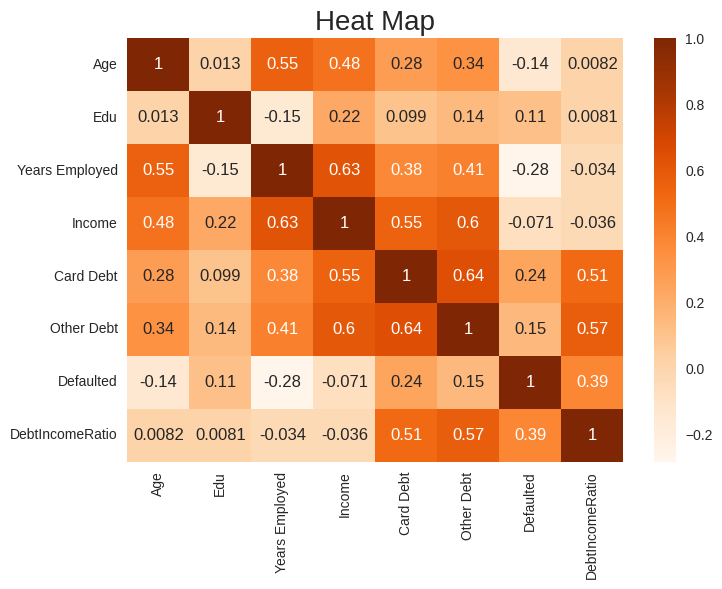

In [41]:
corr = df.corr(numeric_only=True)
corr

sns.heatmap(corr, cmap = 'Oranges', annot = True);

plt.title("Heat Map",fontsize = 20);

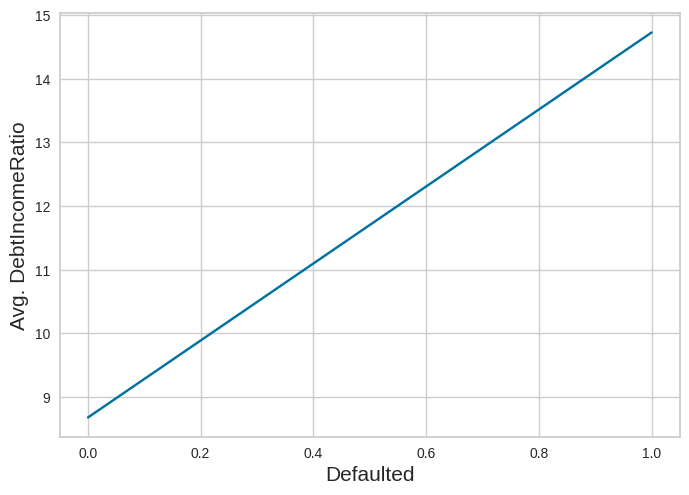

In [42]:
G2=df.groupby('Defaulted')[['DebtIncomeRatio']].mean()
G2=G2.sort_values('Defaulted',ascending=True)
G2=G2.reset_index()
G2
plt.plot(G2['Defaulted'],G2['DebtIncomeRatio'])
plt.style.use('ggplot');

plt.ylabel("Avg. DebtIncomeRatio", fontsize = 15);
plt.xlabel("Defaulted", fontsize = 15);


In [43]:
nulos = df['Defaulted'] == 1.0
df.loc[nulos,:].head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
2,33,2,10,57,6.111,5.802,1.0,20.9
10,44,3,8,88,0.285,5.083,1.0,6.1
14,28,3,2,20,0.233,1.647,1.0,9.4
22,28,3,6,47,5.574,3.732,1.0,19.8
32,23,2,0,42,1.019,0.619,1.0,3.9


In [44]:
nulos = df['Defaulted'] == 0.0
df.loc[nulos,:].head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
6,38,2,4,56,0.442,0.454,0.0,1.6


In [45]:
df['Defaulted'] = df.groupby('DebtIncomeRatio')['Defaulted'].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [46]:
df.isnull().sum()

Age                 0
Edu                 0
Years Employed      0
Income              0
Card Debt           0
Other Debt          0
Defaulted          16
DebtIncomeRatio     0
dtype: int64

In [47]:
nulos = df['Defaulted'].isnull()
df.loc[nulos,:].head(16)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
8,26,1,5,18,0.575,2.215,NaN,15.5
73,25,2,5,42,3.366,3.144,NaN,15.5
151,46,1,7,41,0.585,9.009,NaN,23.4
190,30,1,8,27,3.744,1.737,NaN,20.3
192,37,3,16,75,0.022,0.053,NaN,0.1
307,31,1,3,16,3.065,2.103,NaN,32.3
416,38,1,21,65,2.533,8.387,NaN,16.8
424,48,1,10,70,10.679,9.061,NaN,28.2
431,43,1,8,32,1.234,4.846,NaN,19.0
493,49,2,14,63,0.936,9.018,NaN,15.8


In [48]:
# We'll replace the missing values in the "Defaulted" column with random choices:

for i, value in enumerate(df["Defaulted"]):
  availabe_categories = df["Defaulted"].dropna().unique()
  if pd.isnull(value):  # Check if value is NaN
        random_choice = np.random.choice(availabe_categories)
        df.at[i, "Defaulted"] = random_choice

In [49]:
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [50]:
# I noticed that the "Defaulted" column might be a classifcation column so I'm going to delete it as well
df = df.drop(columns=["Defaulted"],axis=1)

In [51]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

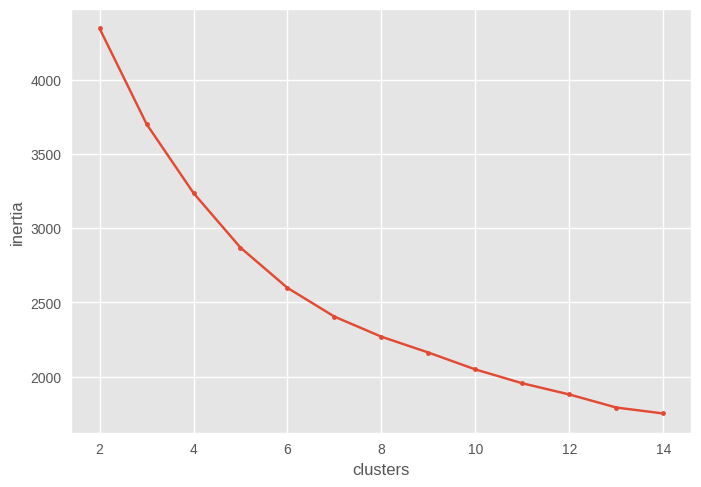

In [52]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 15 and store the inertias in the list.
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,15), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

# it seems like there should be 3 to 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

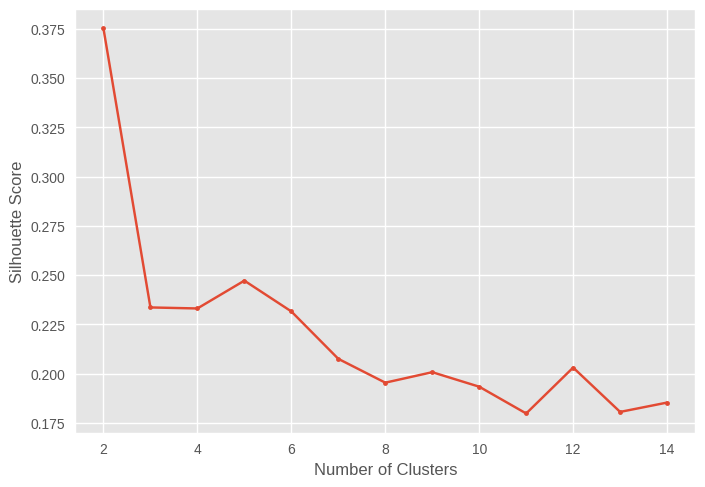

In [53]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 15), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

#The best result seems to be 3 but the result was 0.375 so the model doesn't seem to be working correctly

In [60]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(scaled_df)

# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,6.3,1
1,47,1,26,100,4.582,8.218,12.8,0
2,33,2,10,57,6.111,5.802,20.9,0
3,29,2,4,19,0.681,0.516,6.3,1
4,47,1,31,253,9.308,8.908,7.2,0


In [61]:
#silhouette score
silhouette_score(scaled_df, kmeans.labels_)

0.37524350822454117

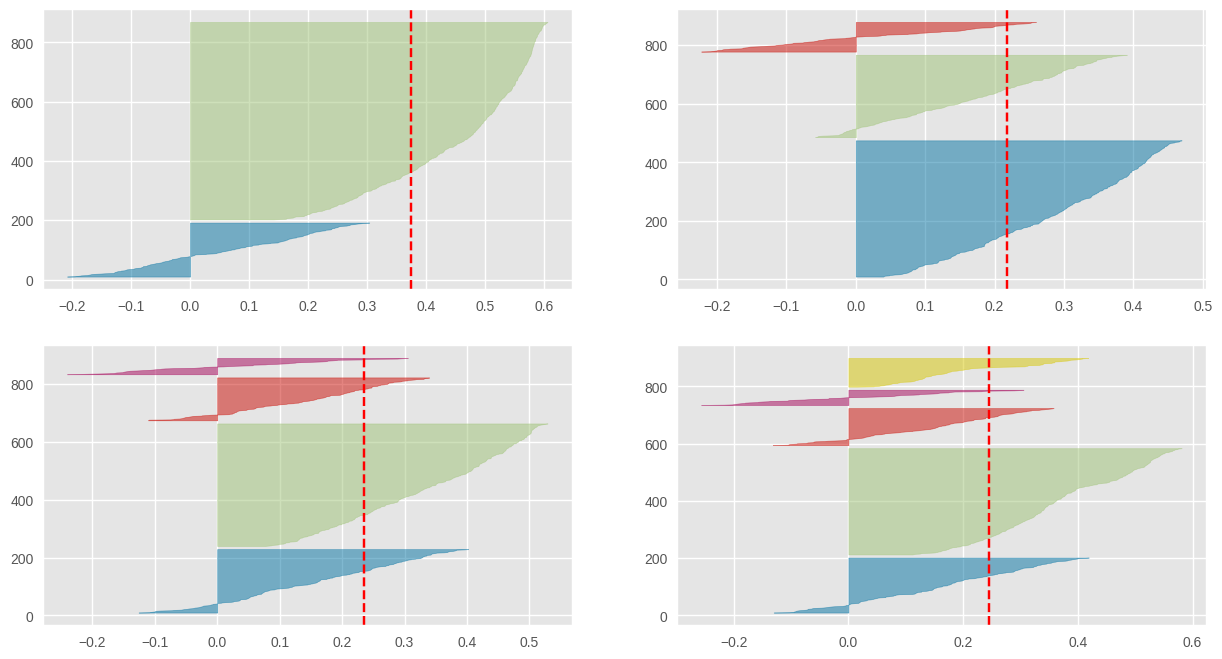

In [62]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for k in [2, 3, 4,5]:

    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df)

# The results don't seem to be good so let's try to readjust the dataset

# Second Model using only certain columns of the original dataframe

In [56]:
columns = ["Years Employed", "Income"]
df2 = df[columns]
df2.head()

,Years Employed,Income
0,6,19
1,26,100
2,10,57
3,4,19
4,31,253


In [57]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
df2 = scaler.fit_transform(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

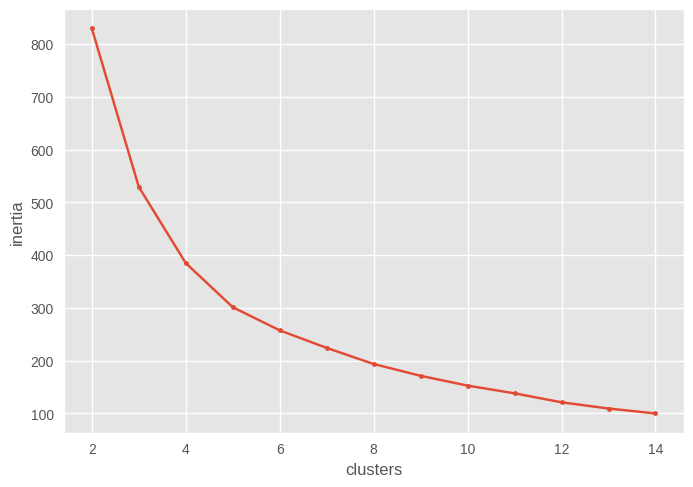

In [58]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 15 and store the inertias in the list.
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,15), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

# it seems like there should be 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

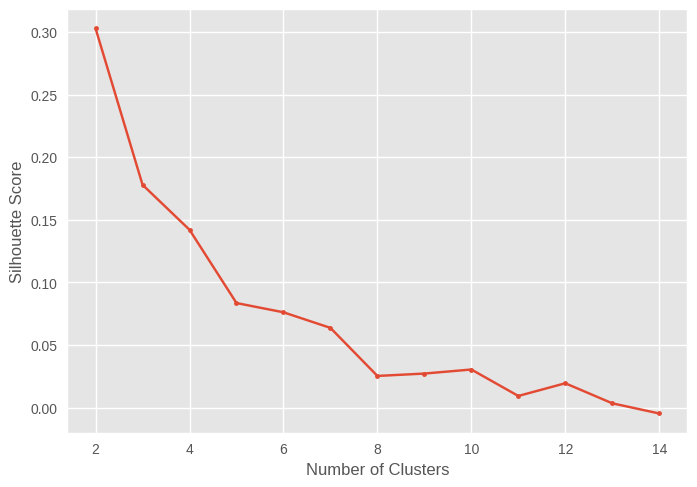

In [59]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df2)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 15), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

The second model didn't improve so we'll use the 1st mode to analize the clusters

# Cluster Analysis

# 2 Clusters

In [63]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,6.3,1
1,47,1,26,100,4.582,8.218,12.8,0
2,33,2,10,57,6.111,5.802,20.9,0
3,29,2,4,19,0.681,0.516,6.3,1
4,47,1,31,253,9.308,8.908,7.2,0


In [64]:
#We'll group the data by cluster
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0,42.579235,1.956284,16.103825,94.382514,3.912016,7.408268,14.020219
1,1,32.958021,1.643178,6.497751,33.586207,0.936129,1.890921,9.115742


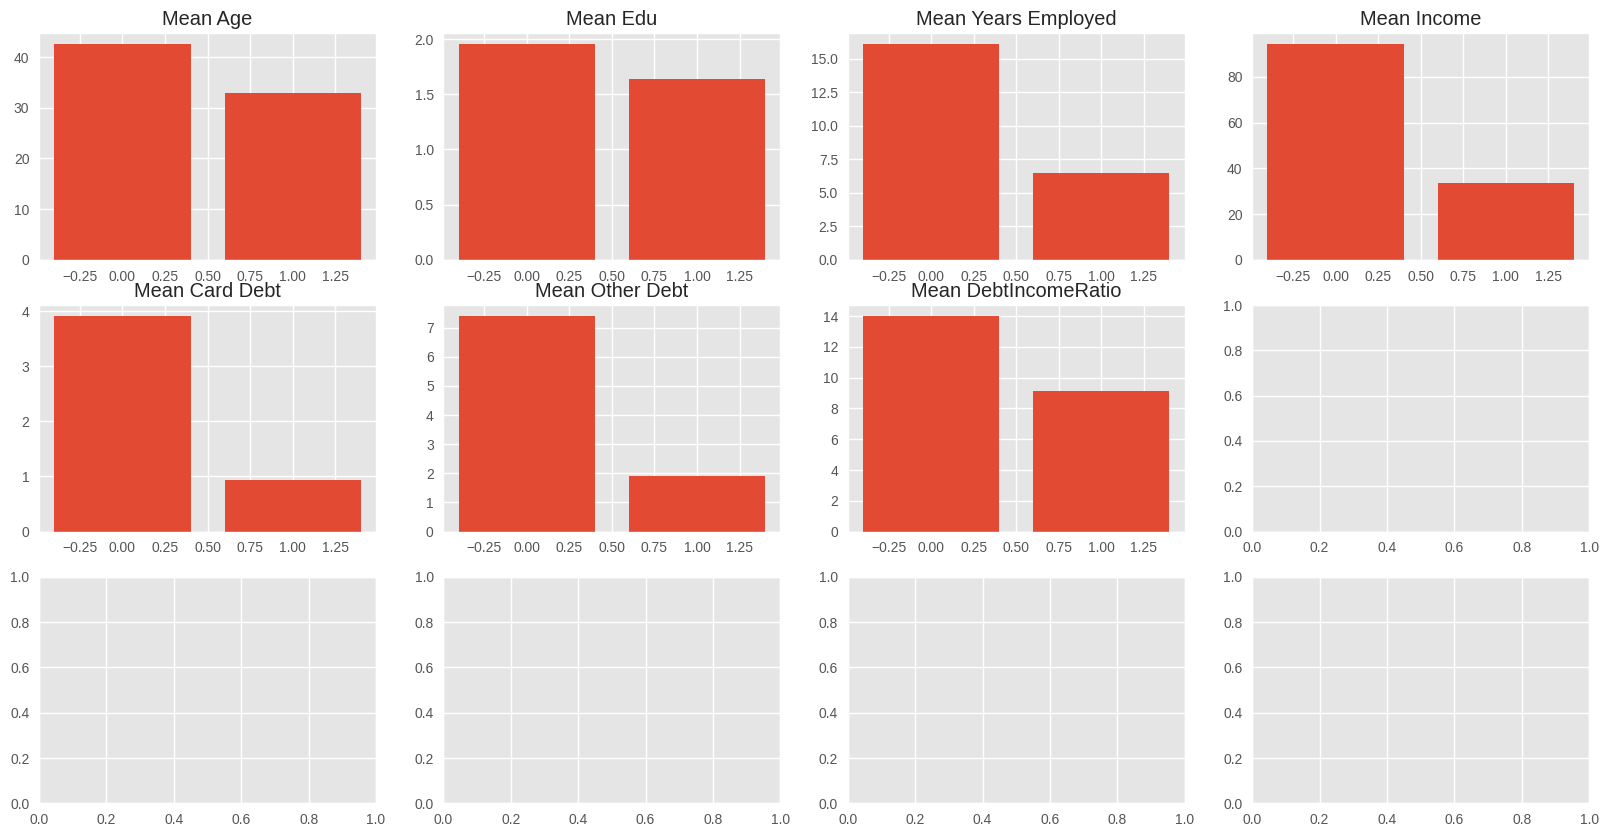

In [65]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

###Results:

The analysis of the two clusters reveals notable distinctions in various aspects of the dataset:

- Cluster 0 exhibits consistently higher mean values compared to Cluster 1 across all characteristics.

- Cluster 0 demonstrates a slightly elevated mean age and education level, with 40 being the maximum age and an education mean of 2.0.

- The most striking disparities are evident in the columns representing mean years employed, mean income, mean card debt, and mean other debt. In these crucial financial metrics, Cluster 0 significantly outperforms Cluster 1, displaying substantially higher values. This suggests that individuals within Cluster 0 tend to have longer employment histories, higher incomes, and more significant financial obligations compared to those in Cluster 1.






In [66]:
#We'll group the clients by cluster 0
df.loc[df['cluster']==0].index

Int64Index([  1,   2,   4,   5,   9,  18,  23,  24,  30,  31,
            ...
            784, 791, 792, 793, 801, 808, 825, 826, 830, 849],
           dtype='int64', length=183)

## 3 Clusters

We'll group the dataset by 3 clusters to analyze them

In [73]:
# Fit kmeans model with 3 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(scaled_df)

# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,6.3,0
1,47,1,26,100,4.582,8.218,12.8,2
2,33,2,10,57,6.111,5.802,20.9,2
3,29,2,4,19,0.681,0.516,6.3,0
4,47,1,31,253,9.308,8.908,7.2,2


In [74]:
#We'll group the data by cluster
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0,29.819742,1.716738,4.334764,28.019313,0.905573,1.810951,9.890773
1,1,41.464539,1.556738,12.989362,56.226950,1.297486,2.730422,7.979078
2,2,41.039216,2.107843,15.666667,105.500000,5.415775,9.834069,17.516667


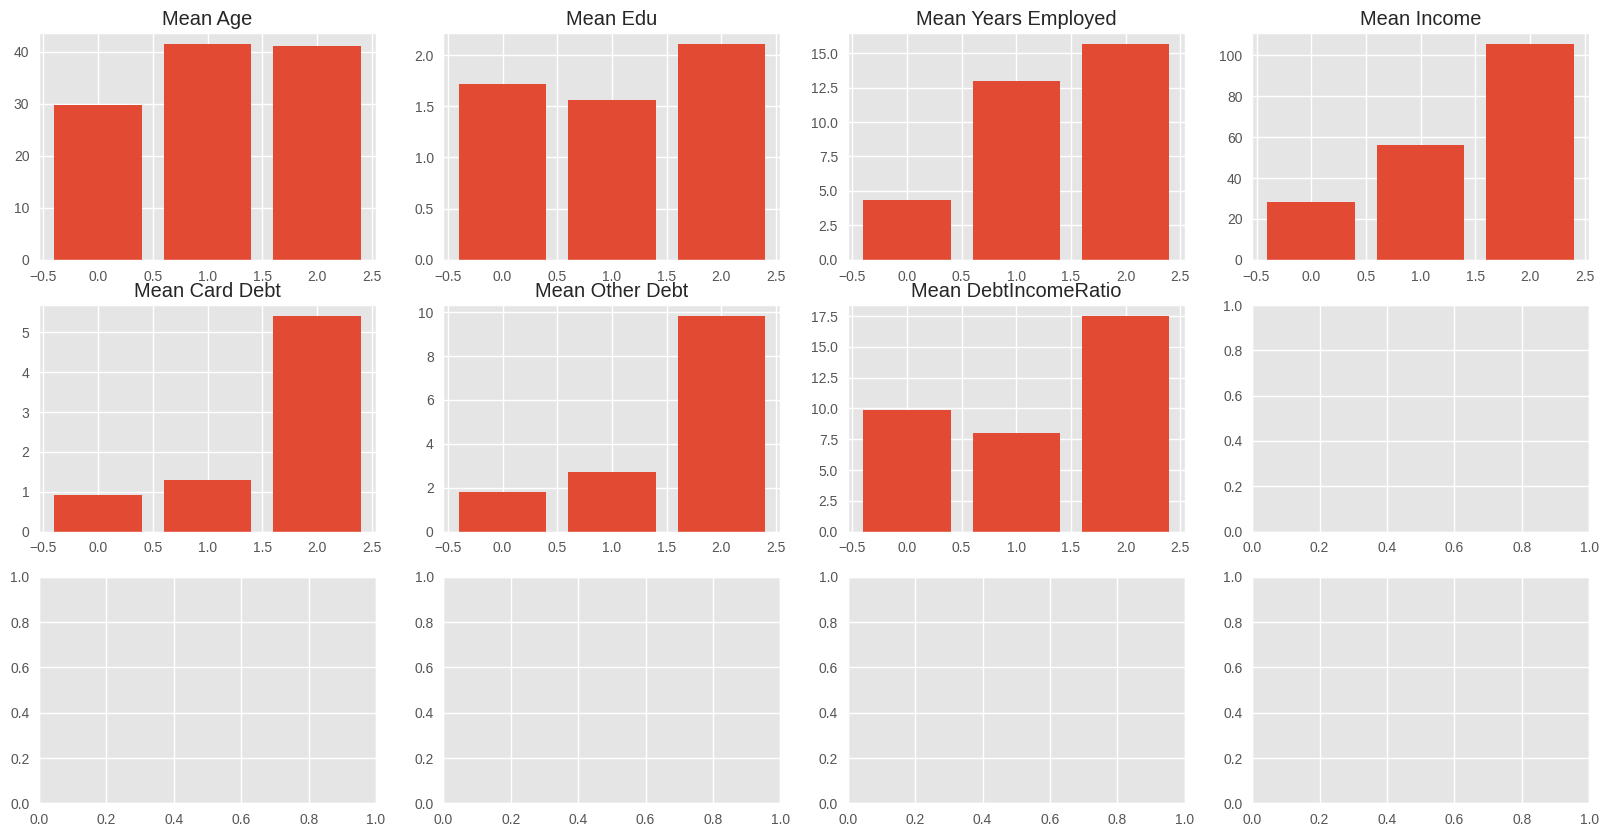

In [75]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

###Results:

- Cluster 0 appears to represent individuals with relatively unfavorable financial metrics. This group exhibits the lowest mean years employed and mean income, which is unsurprisingly accompanied by the lowest levels of card debt and other debt. While their financial situation may not be as robust as the other clusters, it suggests a cautious approach to debt management.

- Cluster 2, on the other hand, emerges as a group with the highest mean education, mean years employed, and mean income. However, these advantages come with a trade-off, as Cluster 2 also carries the highest mean card debt and mean other debt. This cluster appears to be more financially prosperous but potentially at a higher risk of debt accumulation due to their elevated financial capabilities.

- Cluster 1 stands out as the most balanced group. They boast a high mean education level, mean years employed, and mean income, indicating a relatively strong financial profile. What sets Cluster 1 apart is their prudent financial behavior, as evidenced by their lower mean card debt and mean other debt. This cluster appears to have found a harmonious equilibrium between financial success and responsible debt management.

In conclusion, while Cluster 0, Cluster 1, and Cluster 2 each exhibit unique characteristics, Cluster 1 emerges as the most promising group due to their combination of high education, employment stability, income, and responsible debt management. These insights could inform targeted strategies and interventions in various domains, such as financial planning, marketing, or policy development, to better cater to the needs and preferences of each cluster.